##### Loading a json or a text file and converting it into an adjacency matrix

In [24]:
import re
import numpy as np
import pandas as pd

In [223]:
f = open("./data/FW_017_05.txt", "rt") # read as text 
l = []
rownames = []
for line in f:
    line = line.strip()
    # line = line.replace(" ", "")
    if re.findall('^[a-zA-Z][^0-9]*\s[0-9]', line):
        l.append(line)
for i,j in enumerate(l):
    l[i] = j.split("\t")
    rownames.append(l[i][0])
# m = re.findall('[a-zA-Z][^0-9]*\s[0-9]', f)
# csvframe = pd.DataFrame(l, index = rownames)
# if (csvframe[0] == rownames).all(): csvframe.drop(columns = [0], inplace = True)
# questo se la prima colonna è uguale agli indici 
# csvframe.reset_index(rownames)
len(rownames)

17

In [222]:
listofdataframes[4]

,Abalistes stellaris,Acanthopagrus berda,Acanthurus blochii,Anyperodon leucogrammicus,Apogon ellioti,Apogon hyalosoma,Aprion virescens,Arothron hispidus,Arothron manilensis,Arothron stellatus,...,Trichiurus lepturus,Tylosurus crocodilus,Upeneus australiae,Upeneus japonicus,Upeneus moluccensis,Upeneus tragula,Upeneus vittatus,Variola louti,Zebrasoma velifer,
Actinopterygii,0.18,0,0,0.12,1,0,0.12,0.5,0,0,...,0.73,1,0.87,0,0,0.26,0.03,0.07,0.83,0
Anthozoa,0,0,0,0,0,0,0,0,0,0.18,...,0,0,0,0,0,0,0,0,0,0
Asteroidea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Benthic autotroph,0,0.04,1,0,0,0,0,0,0.09,0,...,0,0,0,0,0,0,0,0,0,1
Bivalvia,0.31,0.1,0,0.25,0,0,0,0,0.45,0.36,...,0,0,0.07,0.11,0,0.06,0.03,0.4,0,0
Cephalopoda,0.06,0,0,0,0,0,0,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
Detritus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Echinoidea,0.06,0.01,0,0,0,0,0,0.02,0,0,...,0,0,0,0.03,0,0.01,0,0.02,0,0
Foraminifera,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gastropoda,0,0.08,0,0,0,0,0,0,0.09,0.18,...,0,0,0,0,0,0.01,0,0,0,0


In [187]:
listofdataframes.append(csvframe)

In [210]:
f = open("./data/FW_017_01.txt").read() 
f = f.replace("sp1 FW_017_02",'sp')
# Cerca una maiuscola seguita da un numero arbitrario di minuscole, 
# poi uno spazio, poi un numero arbitrario di minuscole non seguite da uno spazio o da numeri 
# findall("[A-Z][a-z]* [a-z]*[^ 0-9]", f)
columnsnames = re.findall("[A-Z][^0-9\t]+\n", f)[0].split('\n')

# Ho sfruttato il fatto che le righe buone iniziano con una maiuscola e finiscono con un andata a 
# capo senza che nel mezzo ci siano dei numeri o dei tab
# Ovviamente questo fa sì che nel matching prenda anche i New line
# Cioè non separa le righe.Quindi è tutto assieme Da cui il trucco di [0] e split con \n dopo
# Per fare funzionare questo ovviamente non ho tolto \n con le parentesi tonde dentro la stringa,
# me lo sono tenuto per fare uno split semplice dopo
# csvframe.columns = columnsnames[:len(csvframe.columns)]  
len(columnsnames) 

140

In [185]:
csvframe.columns = columnsnames[:len(csvframe.columns)]   


In [109]:
# adesso generalizzo per tutti e sei i file scrivendo i path dentro una lista e per ciascuno i replace corrispondenti
path = ["./data/FW_017_0" + "%i" %i + ".txt" for i in range(1,7)]
replacedata = ["sp1 FW_017_02", "sp1 FW_017_02", "sp1 FW_017_03", "sp1 FW_017_02", "sp1 FW_017_05", "sp1 FW_017"]
listofdataframes = []
for i in range(6):
    f = open(path[i], "rt")
    l = []
    rownames = []
    for line in f:
        line = line.strip()
        # line = line.replace(" ", "")
        if re.findall('^[a-zA-Z][^0-9]*\s[0-9]', line):
            l.append(line)
    for k,j in enumerate(l):
        l[k] = j.split("\t")
        rownames.append(l[i][0])
    csvframe = pd.DataFrame(l)
    if (csvframe[0] == rownames).all(): csvframe.drop(columns = [0], inplace = True)
    f.close()
    f = open(path[i]).read()
    f = f.replace(replacedata[i], "sp")
    columnsnames = re.findall("[A-Z][^0-9\t]+\n", f)[0].split('\n')
    csvframe.columns = columnsnames[:len(csvframe.columns)]
    listofdataframes.append(csvframe)

ValueError: Length mismatch: Expected axis has 165 elements, new values have 4 elements

In [194]:
for i in range(6):
    listofdataframes[i].to_csv(pathcsv[i], index = False)

In [191]:
pathcsv = ["./data/FW_017_0" + "%i" %i + ".csv" for i in range(1,7)]

(array([ 25.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

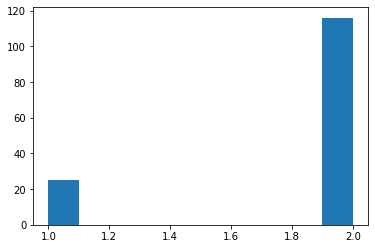

In [227]:
import FoodWebAnalysis as fw

a = fw.load_df("FW_017_06.csv",to_bool=True, normalize=False).astype(int)

In [212]:
import matplotlib.pyplot as plt 